# Compound Poisson processes
___

A conpound Poisson process $X_t$ is a stochastic process satisfying the following:
$$ X_t \,=\, \sum^{N_t}_{i=0} \xi_i, \, \, t \ge 0,$$
where $N_t$ is a Poisson process with parameter $\lambda > 0$ and $\xi_i$ are i.i.d random variables also independent of $N_t$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
%load_ext autoreload
%autoreload 1
%config InlineBackend.figure_formats = {'png', 'retina'}

### Example 1
Let $\xi$ be standard normally distributed.

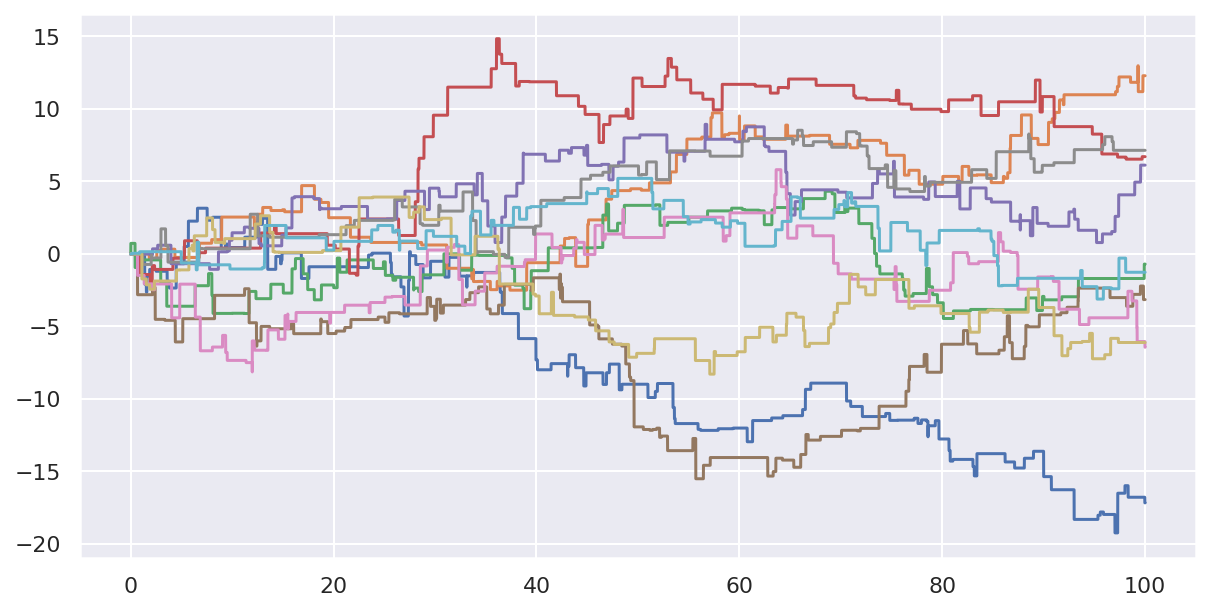

CPU times: user 562 ms, sys: 31.2 ms, total: 594 ms
Wall time: 602 ms


In [2]:
%%time
step = 100000
time_interval = 1e-3
lam = 1
num = 10


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

for _ in range(num):
    param = np.random.poisson(size=step, lam=lam*time_interval).astype(np.float32)
    interval = np.random.randn(step)
    param *= interval
    x = np.cumsum(param)
    t = np.arange(0, step * time_interval, time_interval)
    ax.plot(t, x)
plt.show()

### Example 2
Let $\xi$ is exponentially distributed with a parameter $\beta = 1.$

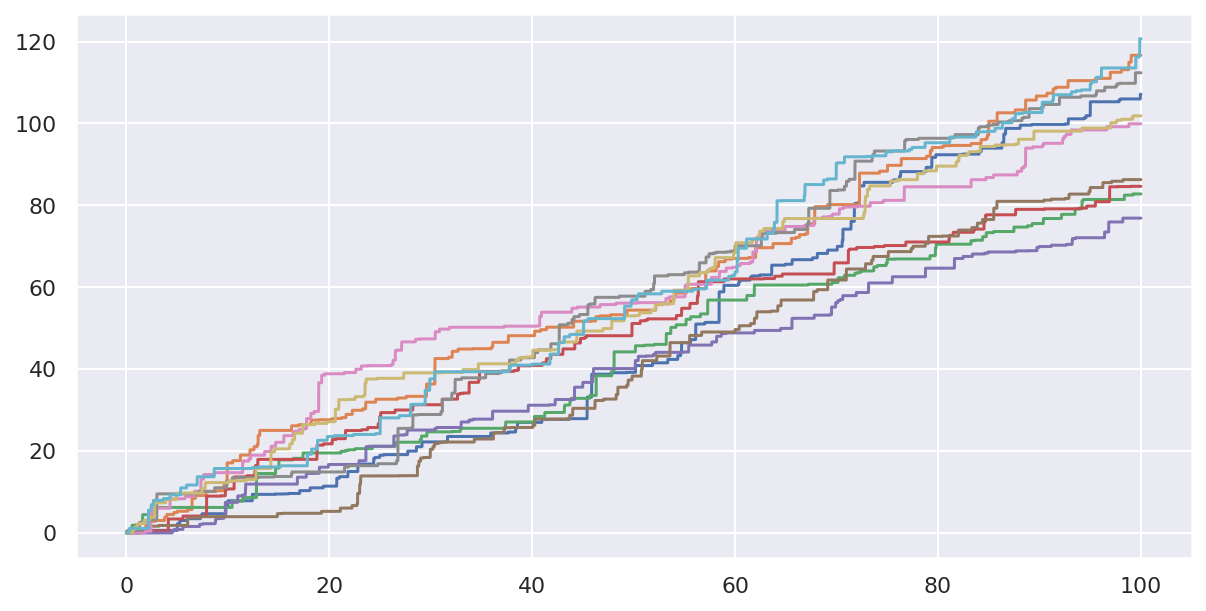

CPU times: user 516 ms, sys: 46.9 ms, total: 562 ms
Wall time: 547 ms


In [3]:
%%time
step = 100000
time_interval = 1e-3
lam = 1
beta = 1
num = 10


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

for _ in range(num):
    param = np.random.poisson(size=step, lam=lam*time_interval).astype(np.float32)
    interval = np.random.exponential(1/beta, step)
    param *= interval
    x = np.cumsum(param)
    t = np.arange(0, step * time_interval, time_interval)
    ax.plot(t, x)
plt.show()

# Cramér-Lundberg Risk Process
___

$$X_t \, = \, x_0 + \delta t - \sum_{i=0}^{N_t} \xi_i, \, \, \delta > 0, \,\,\xi > 0, \,\, t\ge 0. $$

$X_t$ is a model of revenue of an insurance company.  
The company collects premiums at a certain rate $c$ from its customers and at times of Poisson process, a customer will make a claim causing the revenue to jump downwards.

Assume that $x_0 = 100$, $\delta = 100$, and $\xi$ is exponentially distributed with a parameter $\beta = 1/100.$

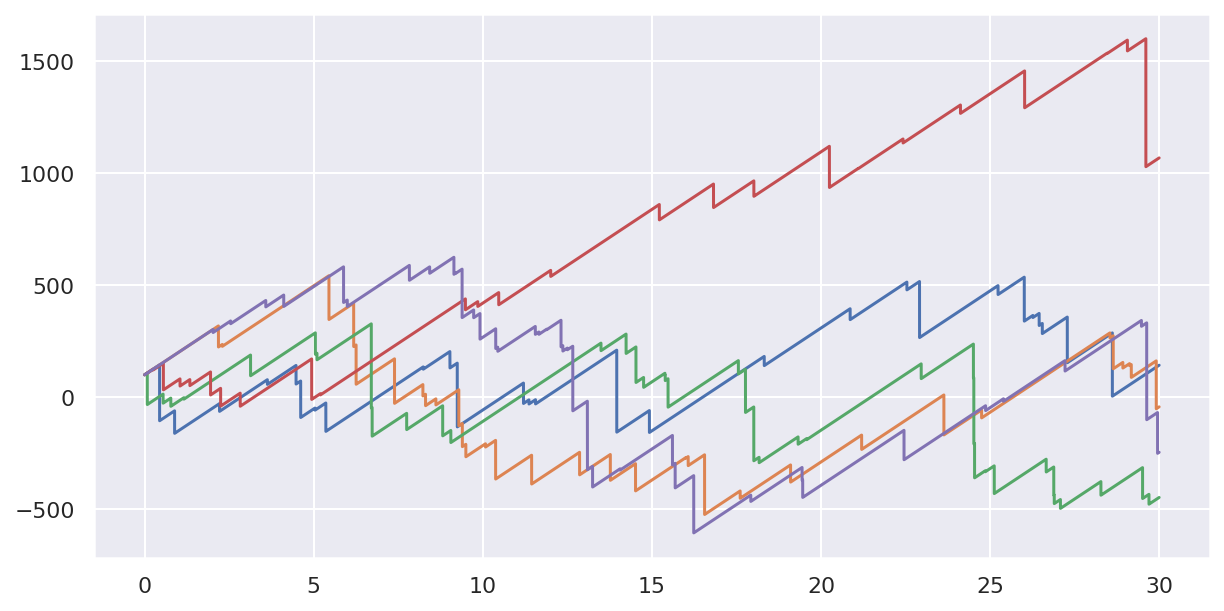

CPU times: user 328 ms, sys: 31.2 ms, total: 359 ms
Wall time: 351 ms


In [4]:
%%time
step = 30000
lam = 1
time_interval = 1e-3
x_0 = 100
delta = 100
beta = 1/100
num = 5


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

for _ in range(num):
    param = np.random.poisson(size=step, lam=lam*time_interval).astype(np.float32)
    interval = np.random.exponential(1/beta, step)
    param *= interval
    x = np.cumsum(param)
    t = np.arange(0, step * time_interval, time_interval)
    y = x_0 + delta * t - x

    ax.plot(t, y)
plt.show()

When $X_0 = 0$, $ E X_1 = \delta - \lambda \mu $, where $\mu = E\xi$.

Let $\tau^-_0 = \inf \{ t > 0 \mid X_t < 0 \}$.

### Ruin distribution
> **Theorem**  
> Suppose $X_0 = 0$ and $EX_1 > 0$. Then $$P(\tau^-_0 < \infty) = \frac{\lambda \mu} {\delta} .$$
> And the distribution $$P(X_{\tau^-_0} \in dx | \tau^-_0 < \infty)$$ is not depend on $\delta$.

Assume $\lambda = 1$ and $\xi = 2U + G/2$, where $U$ is uniformly disctibuted on $[0, 1]$ and $G$ is geometric distribution with parameter $p = 1/4$.   
This implies that $\mu = 4$.  
We set $\delta = 5, 8, 20, 100$.

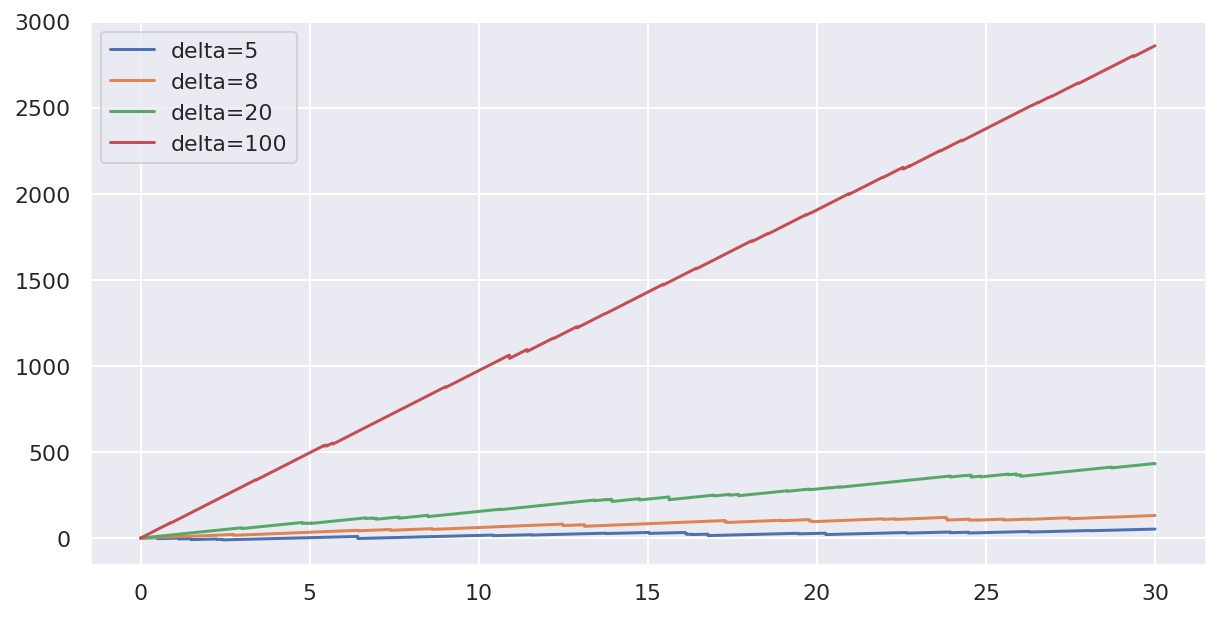

CPU times: user 422 ms, sys: 15.6 ms, total: 438 ms
Wall time: 443 ms


In [5]:
%%time
step = 30000
lam = 1
time_interval = 1e-3
x_0 = 0
deltas = [5, 8, 20, 100]


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

for delta in deltas:
    param = np.random.poisson(size=step, lam=lam*time_interval).astype(np.float32)
    interval = np.random.rand(step) * (5/2)  + np.random.geometric(p=1/3, size=step)
    param *= interval
    x = np.cumsum(param)
    t = np.arange(0, step * time_interval, time_interval)
    y = x_0 + delta * t - x
    ax.plot(t, y, label=f"delta={delta}")
plt.legend()
plt.show()

When $\delta = 5, 8, 20, 100$, $P(\tau^-_0 < \infty) = 0.8, 0.5, 0.2, 0.04$.

delta:5, Ruin Prob Theorem: 0.8, Ruin Prob Calculation: 0.8303
delta:8, Ruin Prob Theorem: 0.5, Ruin Prob Calculation: 0.5245
delta:20, Ruin Prob Theorem: 0.2, Ruin Prob Calculation: 0.2146
delta:100, Ruin Prob Theorem: 0.04, Ruin Prob Calculation: 0.0423


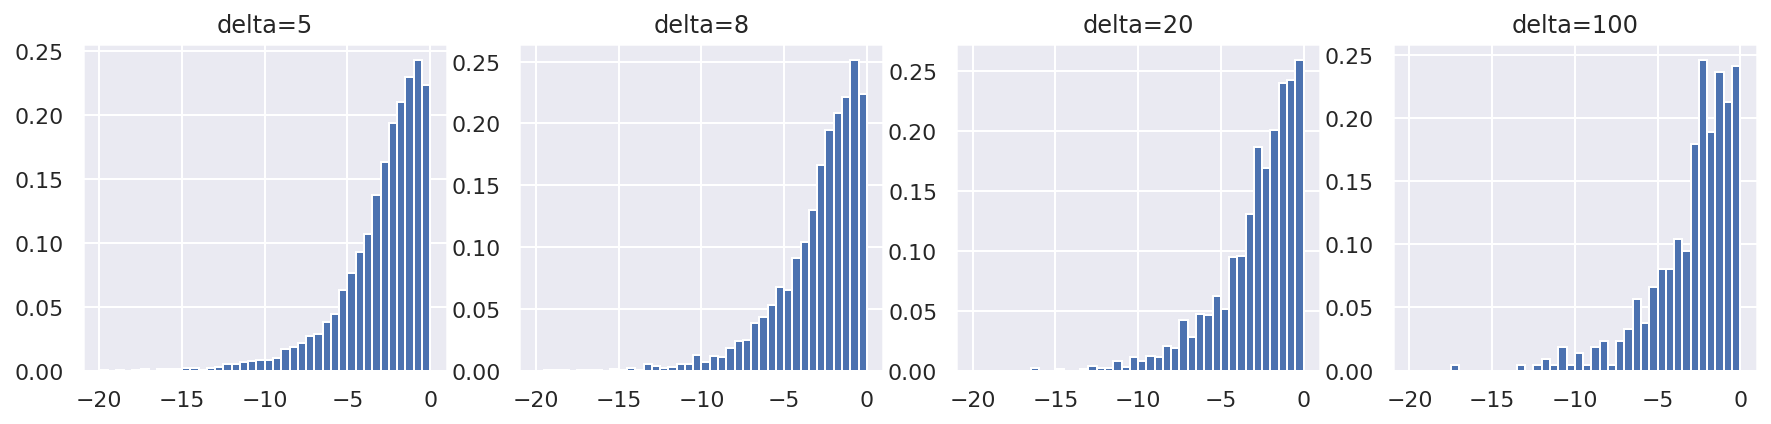

CPU times: user 2min 20s, sys: 1min 57s, total: 4min 18s
Wall time: 4min 19s


In [6]:
%%time
step = 30000
lam = 1
time_interval = 1e-3
x_0 = 0
deltas = [5, 8, 20, 100]
num = 10000
ruin_prob_thms = [0.8, 0.5, 0.2, 0.04]


fig = plt.figure(figsize=(15, 3))

for i, (delta, ruin_prob_thm) in enumerate(zip(deltas, ruin_prob_thms), start=1):
    param = np.random.poisson(size=(num, step), lam=lam*time_interval).astype(np.float32)
    interval = np.random.rand(num, step) * (5/2)  + np.random.geometric(p=1/3, size=(num, step))
    param *= interval
    x = np.cumsum(param, axis=1)
    t = np.arange(0, step * time_interval, time_interval)
    y = x_0 + delta * t - x
    ruin_coord = [np.where(ye < 0)[0] for ye in y]
    ruin_coord = [(i, rc[0]) for i, rc in enumerate(ruin_coord) if len(rc)]
    ruin_prob = len(ruin_coord) / num
    ruin_value = [y[rc] for rc in ruin_coord]
    print(f"delta:{delta}, Ruin Prob Theorem: {ruin_prob_thm}, Ruin Prob Calculation: {ruin_prob}")
    ax = fig.add_subplot(1, 4, i)
    ax.hist(ruin_value, density=True, range=(-20, 0), bins=40)
    ax.set_title(f"delta={delta}")
plt.show()

# The M/G/1 queue
____

$$W_t \, = \,w + \sum_{i=0}^{N_t}\xi_i - t, \, \, W_t > 0 ,\,$$
where $w \ge 0.$ And once $W_t = 0$, it remains $0$ until the next jump.

Customers arrive at a service desk according to a Poisson process and join a queue.

Assume $w = 0$ and $\xi$ is exponentially distributed with $\beta = 1$.   
We can say $ W_t = \left( w \vee (\sup_{s \le t} X_s)\right) - X_t $ for some Compound Poisson process with drift $X_t$.

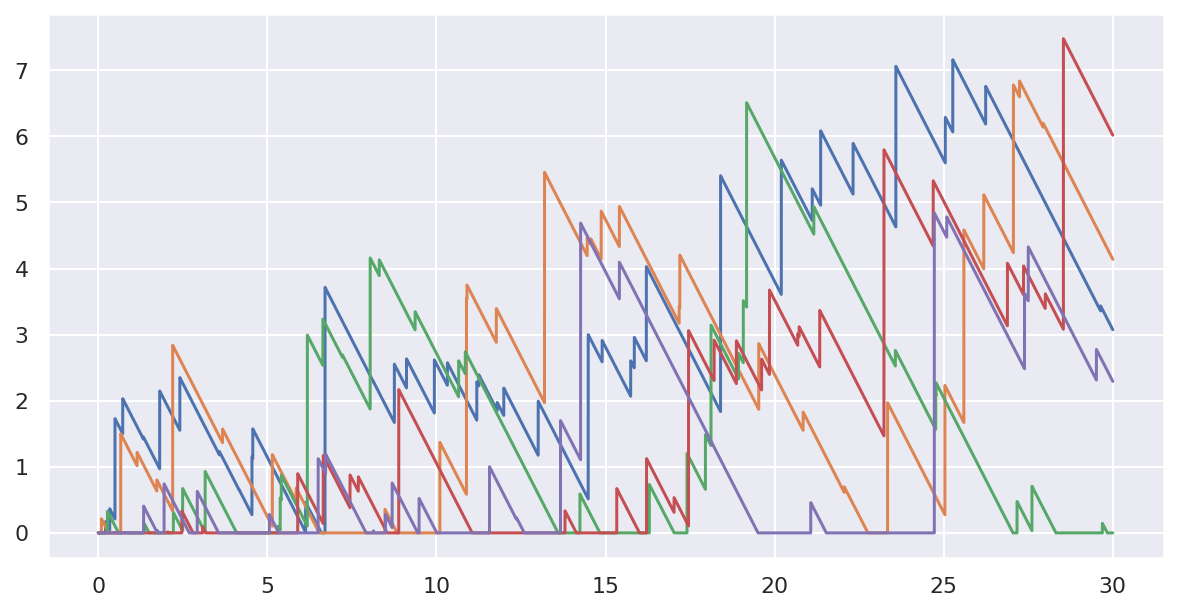

CPU times: user 1.59 s, sys: 1.84 s, total: 3.44 s
Wall time: 3.59 s


In [7]:
%%time
step = 30000
time_interval = 1e-3
lam = 1
beta = 1
num = 5


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

for _ in range(num):
    param = np.random.poisson(size=step, lam=lam*time_interval).astype(np.float32)
    interval = np.random.exponential(1/beta, step)
    param *= interval
    cache = 0
    y = []
    for x in param:
        cache += x - time_interval
        cache = max(cache, 0)
        y.append(cache)
    ax.plot(t, y)
plt.show()